In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

df = pd.read_csv("data/voter_fraud_cases.csv")
df['Year'] = df['Year'].astype(int)

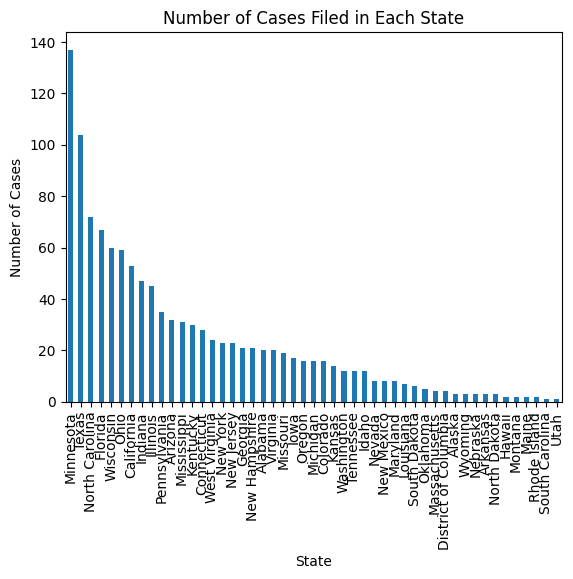

In [108]:
df['State'].value_counts().plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.title('Number of Cases Filed in Each State')
plt.show()

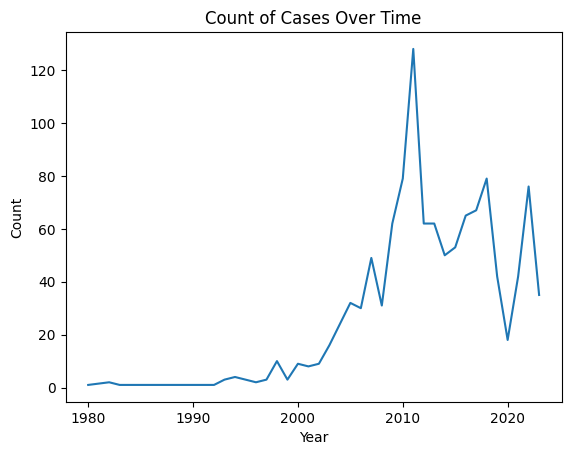

In [109]:
df['Year'] = df['Year'].astype(int)

grouped_data = df.groupby('Year', dropna=True).size()
grouped_data.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Cases Over Time')
plt.show()

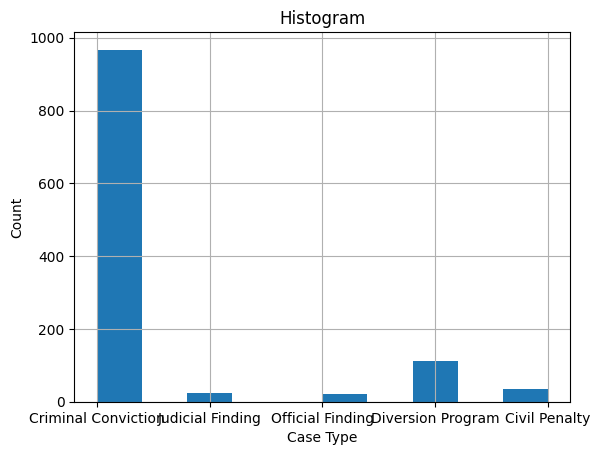

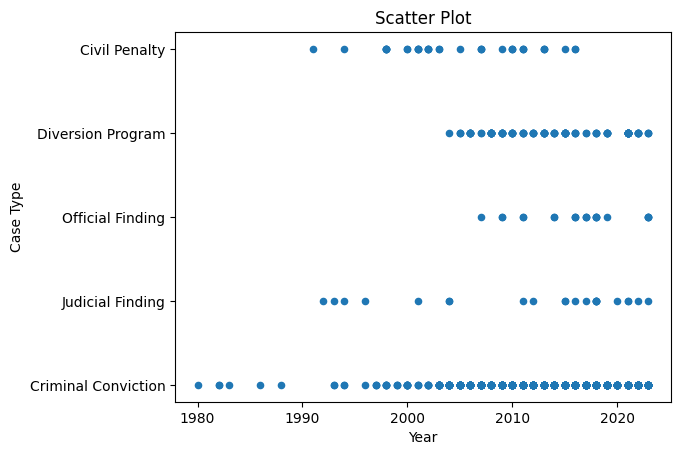

In [110]:
# Example 1: Histogram
df['Case Type'].hist()
plt.xlabel('Case Type')
plt.ylabel('Count')
plt.title('Histogram')
plt.show()

# Example 2: Scatter plot
df.plot.scatter(x='Year', y='Case Type')
plt.xlabel('Year')
plt.ylabel('Case Type')
plt.title('Scatter Plot')
plt.show()

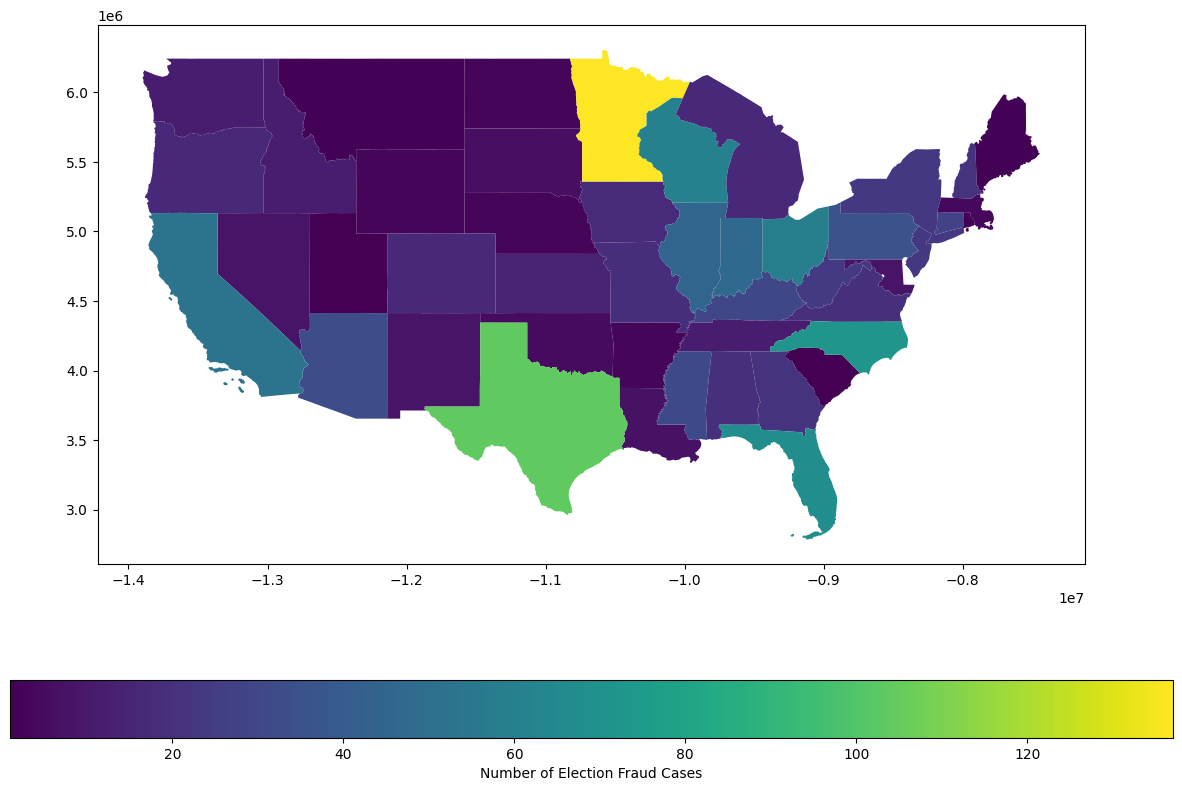

In [111]:
states = geopandas.read_file('shape_file/tl_2012_us_state.shp')

states = states.to_crs("EPSG:3395")
states = states[states['STUSPS'].isin(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 
                                       'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 
                                       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 
                                       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 
                                       'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 
                                       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 
                                       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 
                                       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])]

# Merge the counts with the shapefile data
counts = df['State'].value_counts()
states = states.merge(counts, left_on='NAME', right_index=True)

# Plot the map with color based on counts
states.plot(
    cmap='viridis', 
    column='count', 
    figsize=(15, 10), 
    legend=True, 
    legend_kwds={"label": "Number of Election Fraud Cases", "orientation": "horizontal"}
    );